In [2]:
import sqlite3
import os
import pandas as pd
import matplotlib.pyplot as plt
conn = sqlite3.connect(os.path.abspath('final.db'))
cur = conn.cursor()

In [3]:
joined_query = "SELECT wp.*, we.index_value, s.ticker FROM WeeklyPrices wp JOIN WeeklyEconomicIndex we ON wp.date = we.date join Stocks s on wp.stock_id = s.id  "
weekly_prices_query = "SELECT * FROM WeeklyPrices"
sentiment_query = "SELECT * FROM SentimentData"
weekly_economic_index = "SELECT * FROM WeeklyEconomicIndex"


In [4]:
joined_df = pd.read_sql(joined_query, conn)
weekly_prices_df = pd.read_sql(weekly_prices_query, conn)
sentiment_df = pd.read_sql(sentiment_query, conn)
joined_df.head(10)


,stock_id,date,open,high,low,close,volume,index_value,ticker
0,1,2024-11-29,141.99,142.050,131.8000,138.25,903463597,1.79,NVDA
1,1,2024-11-22,139.50,152.890,137.1500,141.95,1396925283,3.21,NVDA
2,1,2024-11-15,148.68,149.650,140.0800,141.98,1017459795,1.87,NVDA
3,1,2024-11-08,137.21,149.770,135.5700,147.63,973098624,2.04,NVDA
4,1,2024-11-01,143.00,143.140,132.1106,135.40,987765940,1.65,NVDA
5,1,2024-10-25,138.13,144.420,137.4600,141.54,1154273138,2.11,NVDA
6,1,2024-10-18,136.47,140.890,128.7400,138.00,1357584514,1.71,NVDA
7,1,2024-10-11,124.99,135.780,124.9500,134.80,1290685141,1.94,NVDA
8,1,2024-10-04,118.31,125.040,115.1400,124.92,1272577548,2.22,NVDA
9,1,2024-09-27,116.55,127.665,114.8600,121.40,1419480253,2.07,NVDA


In [7]:
joined_df.to_csv(path_or_buf="FINAL")

In [29]:
# filter the five companies
start_date = "2024-07-02"
end_date = "2024-12-07"
filtered_index_joined_df = joined_df[(joined_df['date'] >= start_date) & (joined_df['date'] <= end_date)]
filtered_index_joined_df['percentage_growth_index'] = filtered_index_joined_df['index_value'].pct_change() * 100


nvda_joined_df = joined_df[joined_df['ticker'] == 'NVDA']
nvda_joined_df['percentage_growth_stock'] = round(((nvda_joined_df['close'] - nvda_joined_df['open']) / nvda_joined_df['open']) * 100, 2)
nvda_joined_df['percentage_growth_index'] = nvda_joined_df['index_value'].pct_change() * 100
filtered_nvda_joined_df = nvda_joined_df[(nvda_joined_df['date'] >= start_date) & (nvda_joined_df['date'] <= end_date)]
filtered_nvda_joined_df.sort_values(by='date', inplace=True)


aapl_joined_df = joined_df[joined_df['ticker'] == 'AAPL']
aapl_joined_df['percentage_growth_stock'] = round(((aapl_joined_df['close'] - aapl_joined_df['open']) / aapl_joined_df['open']) * 100, 2)
aapl_joined_df['percentage_growth_index'] = aapl_joined_df['index_value'].pct_change() * 100
filtered_aapl_joined_df = aapl_joined_df[(aapl_joined_df['date'] >= start_date) & (aapl_joined_df['date'] <= end_date)]
filtered_aapl_joined_df.sort_values(by='date', inplace=True)

msft_joined_df = joined_df[joined_df['ticker'] == 'MSFT']
msft_joined_df['percentage_growth_stock'] = round(((msft_joined_df['close'] - msft_joined_df['open']) / msft_joined_df['open']) * 100, 2)
msft_joined_df['percentage_growth_index'] = msft_joined_df['index_value'].pct_change() * 100
filtered_msft_joined_df = msft_joined_df[(msft_joined_df['date'] >= start_date) & (msft_joined_df['date'] <= end_date)]
filtered_msft_joined_df.sort_values(by='date', inplace=True)

meta_joined_df = joined_df[joined_df['ticker'] == 'META']
meta_joined_df['percentage_growth_stock'] = round(((meta_joined_df['close'] - meta_joined_df['open']) / meta_joined_df['open']) * 100, 2)
meta_joined_df['percentage_growth_index'] = meta_joined_df['index_value'].pct_change() * 100
filtered_meta_joined_df = meta_joined_df[(meta_joined_df['date'] >= start_date) & (meta_joined_df['date'] <= end_date)]
filtered_meta_joined_df.sort_values(by='date', inplace=True)

amzn_joined_df = joined_df[joined_df['ticker'] == 'AMZN']
amzn_joined_df['percentage_growth_stock'] = round(((amzn_joined_df['close'] - amzn_joined_df['open']) / amzn_joined_df['open']) * 100, 2)
amzn_joined_df['percentage_growth_index'] = amzn_joined_df['index_value'].pct_change() * 100
filtered_amzn_joined_df = amzn_joined_df[(amzn_joined_df['date'] >= start_date) & (amzn_joined_df['date'] <= end_date)]
filtered_amzn_joined_df.sort_values(by='date', inplace=True)
filtered_aapl_joined_df

/var/folders/17/7cjczr495wgc7kvz5wdr78vc0000gn/T/ipykernel_62973/4257527281.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_index_joined_df['percentage_growth_index'] = filtered_index_joined_df['index_value'].pct_change() * 100
/var/folders/17/7cjczr495wgc7kvz5wdr78vc0000gn/T/ipykernel_62973/4257527281.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nvda_joined_df['percentage_growth_stock'] = round(((nvda_joined_df['close'] - nvda_joined_df['open']) / nvda_joined_df['open']) * 100, 2)
/var/

,stock_id,date,open,high,low,close,volume,index_value,ticker,percentage_growth_stock,percentage_growth_index
45,2,2024-07-05,212.09,226.4500,211.9200,226.34,216231316,2.66,AAPL,6.72,46.961326
44,2,2024-07-12,227.09,233.0800,223.2500,230.54,287640514,1.81,AAPL,1.52,-8.585859
43,2,2024-07-19,236.48,237.2300,222.2700,224.31,278397452,1.98,AAPL,-5.15,17.857143
42,2,2024-07-26,227.01,227.7800,214.6200,217.96,242932215,1.68,AAPL,-3.99,-8.196721
41,2,2024-08-02,216.96,225.6000,215.7500,219.86,296061436,1.83,AAPL,1.34,-8.040201
40,2,2024-08-09,199.09,216.7800,196.0000,216.24,342088289,1.99,AAPL,8.61,-1.485149
39,2,2024-08-16,216.07,226.8271,215.6000,226.05,214898250,2.02,AAPL,4.62,2.538071
38,2,2024-08-23,225.72,228.3400,223.0400,226.84,188124897,1.97,AAPL,0.50,-16.170213
37,2,2024-08-30,226.76,232.9200,223.8905,229.00,209486001,2.35,AAPL,0.99,18.090452
36,2,2024-09-06,228.55,229.0000,217.4800,220.82,178491741,1.99,AAPL,-3.38,-1.970443


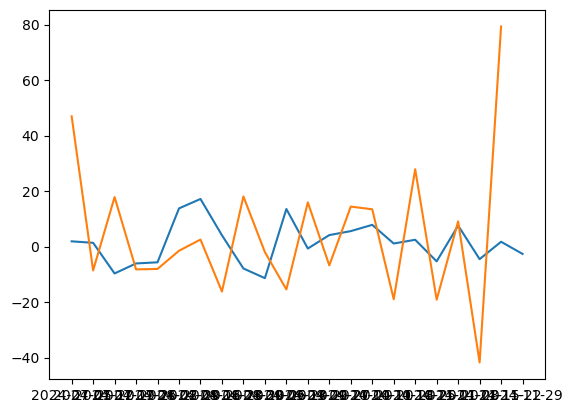

In [23]:
plt.plot(filtered_nvda_joined_df['date'], filtered_nvda_joined_df['percentage_growth_stock'])
plt.plot(filtered_nvda_joined_df['date'], filtered_nvda_joined_df['percentage_growth_index'])

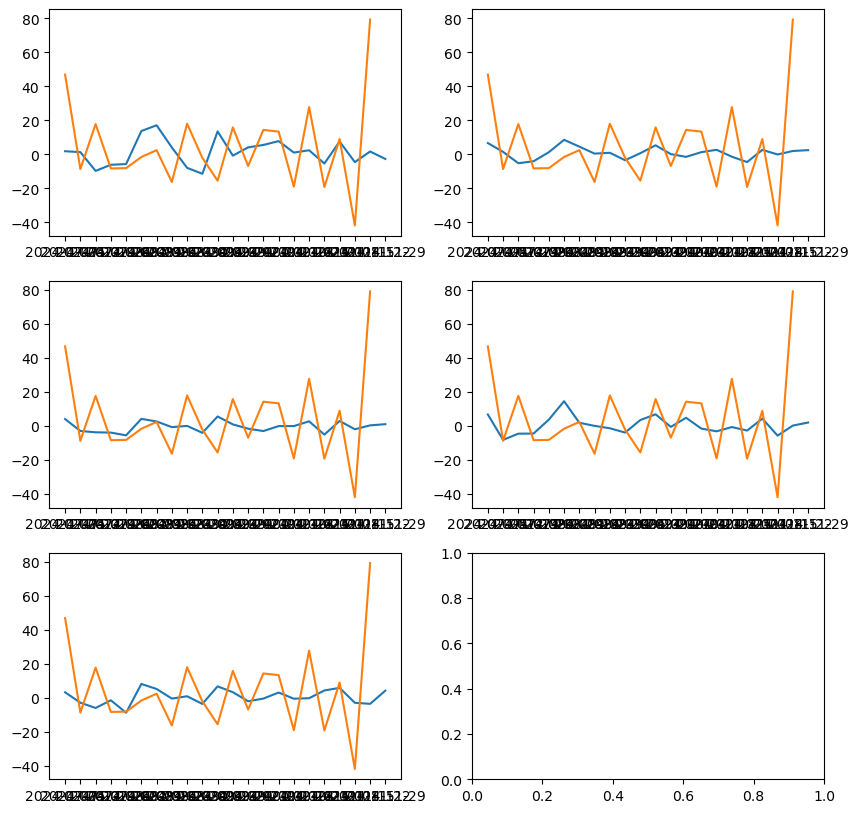

In [24]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 10))
axes = axes.flatten()
axes[0].plot(filtered_nvda_joined_df['date'], filtered_nvda_joined_df['percentage_growth_stock'])
axes[0].plot(filtered_nvda_joined_df['date'], filtered_nvda_joined_df['percentage_growth_index'])

axes[1].plot(filtered_aapl_joined_df['date'], filtered_aapl_joined_df['percentage_growth_stock'])
axes[1].plot(filtered_aapl_joined_df['date'], filtered_aapl_joined_df['percentage_growth_index'])


axes[2].plot(filtered_msft_joined_df['date'], filtered_msft_joined_df['percentage_growth_stock'])
axes[2].plot(filtered_msft_joined_df['date'], filtered_msft_joined_df['percentage_growth_index'])

axes[3].plot(filtered_meta_joined_df['date'], filtered_meta_joined_df['percentage_growth_stock'])
axes[3].plot(filtered_meta_joined_df['date'], filtered_meta_joined_df['percentage_growth_index'])

axes[4].plot(filtered_amzn_joined_df['date'], filtered_amzn_joined_df['percentage_growth_stock'])
axes[4].plot(filtered_amzn_joined_df['date'], filtered_amzn_joined_df['percentage_growth_index'])



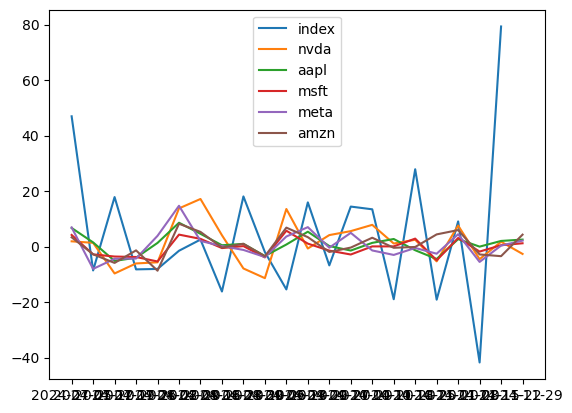

In [25]:
plt.plot(filtered_nvda_joined_df['date'], filtered_nvda_joined_df['percentage_growth_index'])
plt.plot(filtered_nvda_joined_df['date'], filtered_nvda_joined_df['percentage_growth_stock'])

plt.plot(filtered_aapl_joined_df['date'], filtered_aapl_joined_df['percentage_growth_stock'])


plt.plot(filtered_msft_joined_df['date'], filtered_msft_joined_df['percentage_growth_stock'])


plt.plot(filtered_meta_joined_df['date'], filtered_meta_joined_df['percentage_growth_stock'])


plt.plot(filtered_amzn_joined_df['date'], filtered_amzn_joined_df['percentage_growth_stock'])
plt.legend(['index', 'nvda', 'aapl', 'msft', 'meta', 'amzn'])

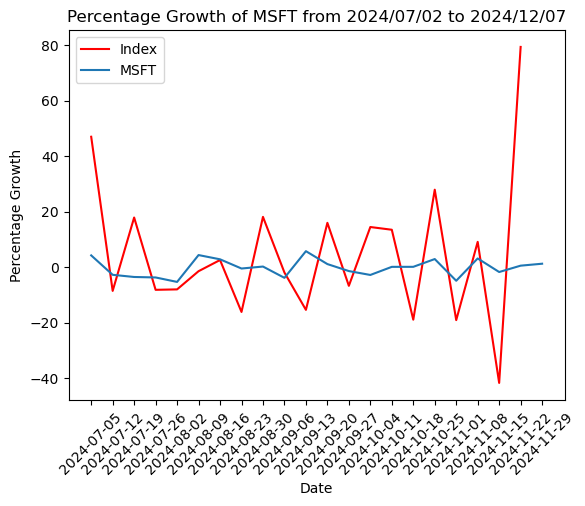

In [30]:
# VISUALIZATION 1
# df dict
df_dict = {'NVDA': filtered_nvda_joined_df, 'AAPL': filtered_aapl_joined_df, 'MSFT': filtered_msft_joined_df, 'META': filtered_meta_joined_df, 'AMZN': filtered_amzn_joined_df}

# company_symbol: NVDA, AAPL, MSFT, META, AMZN
def graph_index_stock(company_symbol):
    if company_symbol in df_dict:
        df = df_dict[company_symbol]
        plt.plot(df['date'], df['percentage_growth_index'], color='red')
        plt.plot(df['date'], df['percentage_growth_stock'])
        plt.legend(['Index', company_symbol])
        plt.xticks(rotation=45)
        plt.title("Percentage Growth of " + company_symbol + " from 2024/07/02 to 2024/12/07")
        plt.xlabel("Date")
        plt.ylabel("Percentage Growth")
graph_index_stock('MSFT')

/var/folders/17/7cjczr495wgc7kvz5wdr78vc0000gn/T/ipykernel_62973/3995364233.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_nvda_joined_df['date'] = pd.to_datetime(filtered_nvda_joined_df['date'])
/var/folders/17/7cjczr495wgc7kvz5wdr78vc0000gn/T/ipykernel_62973/3995364233.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_aapl_joined_df['date'] = pd.to_datetime(filtered_aapl_joined_df['date'])
/var/folders/17/7cjczr495wgc7kvz5wdr78vc0000gn/T/ipykernel_62973/3995364233.py:10: SettingWi

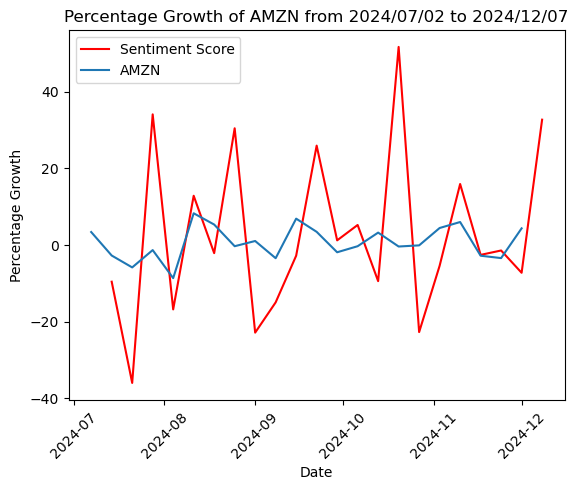

In [31]:
# VISUALIZATION 2
sentiment_df
sentiment_df['date'] = pd.to_datetime(sentiment_df['date'])
sentiment_df_grouped_mean = pd.DataFrame(sentiment_df.groupby(pd.Grouper(key='date', freq='W'))['sentiment_score'].mean())
sentiment_df_grouped_mean['percentage_growth_sentiment'] = sentiment_df_grouped_mean['sentiment_score'].pct_change() * 100
sentiment_df_grouped_mean.reset_index(inplace=True)

filtered_nvda_joined_df['date'] = pd.to_datetime(filtered_nvda_joined_df['date'])
filtered_aapl_joined_df['date'] = pd.to_datetime(filtered_aapl_joined_df['date'])
filtered_msft_joined_df['date'] = pd.to_datetime(filtered_msft_joined_df['date'])
filtered_meta_joined_df['date'] = pd.to_datetime(filtered_meta_joined_df['date'])
filtered_amzn_joined_df['date'] = pd.to_datetime(filtered_amzn_joined_df['date'])

filtered_nvda_joined_df['new_date'] = filtered_nvda_joined_df['date'] + pd.Timedelta(days=2)
filtered_aapl_joined_df['new_date'] = filtered_aapl_joined_df['date'] + pd.Timedelta(days=2)
filtered_msft_joined_df['new_date'] = filtered_msft_joined_df['date'] + pd.Timedelta(days=2)
filtered_meta_joined_df['new_date'] = filtered_meta_joined_df['date'] + pd.Timedelta(days=2)
filtered_amzn_joined_df['new_date'] = filtered_amzn_joined_df['date'] + pd.Timedelta(days=2)


# company_symbol: NVDA, AAPL, MSFT, META, AMZN
def graph_index_stock(company_symbol):
    if company_symbol in df_dict:
        df = df_dict[company_symbol]
        plt.plot(sentiment_df_grouped_mean['date'], sentiment_df_grouped_mean['percentage_growth_sentiment'], color='red')
        plt.plot(df['new_date'], df['percentage_growth_stock'])
        plt.legend(['Sentiment Score', company_symbol])
        plt.xticks(rotation=45)
        plt.title("Percentage Growth of " + company_symbol + " from 2024/07/02 to 2024/12/07")
        plt.xlabel("Date")
        plt.ylabel("Percentage Growth")
graph_index_stock('AMZN')


Text(0, 0.5, 'Percentage Growth')

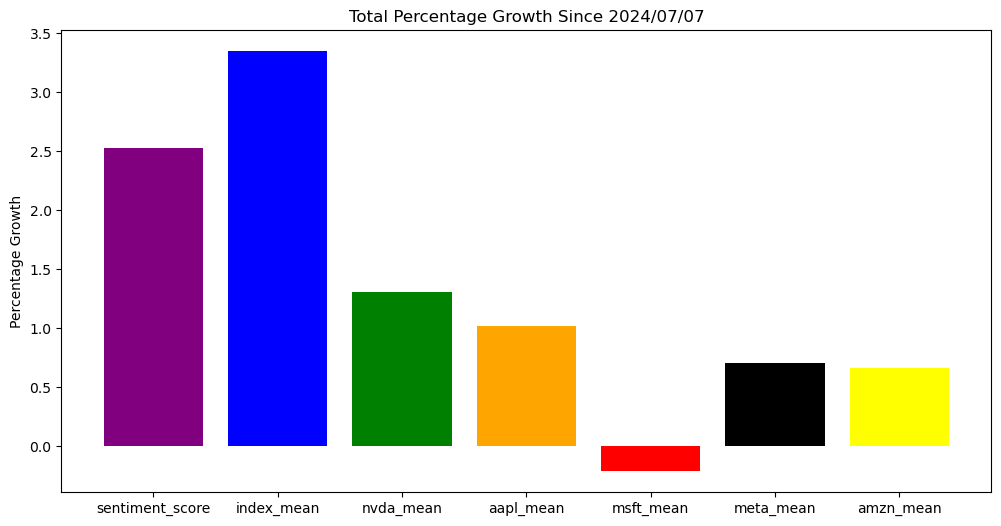

In [28]:
# VISUALIZTION 3
plt.figure(figsize=(12, 6))
sentiment_score_mean = sentiment_df_grouped_mean['percentage_growth_sentiment'].mean()
index_mean = filtered_index_joined_df['percentage_growth_index'].mean()
nvda_mean = filtered_nvda_joined_df['percentage_growth_stock'].mean()
aapl_mean = filtered_aapl_joined_df['percentage_growth_stock'].mean()
msft_mean = filtered_msft_joined_df['percentage_growth_stock'].mean()
meta_mean = filtered_meta_joined_df['percentage_growth_stock'].mean()
amzn_mean = filtered_amzn_joined_df['percentage_growth_stock'].mean()
colors = ['purple', 'blue', 'green', 'orange', 'red', 'black', 'yellow']
plt.bar(['sentiment_score', 'index_mean', 'nvda_mean', 'aapl_mean', 'msft_mean', 'meta_mean', 'amzn_mean'], [sentiment_score_mean, index_mean, nvda_mean, aapl_mean, msft_mean, meta_mean, amzn_mean], color=colors)
plt.title("Total Percentage Growth Since 2024/07/07")
plt.ylabel("Percentage Growth")